<a href="https://colab.research.google.com/github/lialic/computer_vision/blob/master/CNN%20test/VGGNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
In this lesson, we will use VGGNet to classify 2 class: Cat and Dog
The data from training and testing is taken from Kaggle and Pinterest.

Dataset from Kaggle can be found in this link: [Dog vs Cat](https://www.kaggle.com/c/dogs-vs-cats)


# Preparation

## Mounting drive for dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/MyDrive/Data')
!pwd

/content/drive/.shortcut-targets-by-id/11fY6QpzsiYw6V2T_S6CWlNWJBdypvsA-/Data


## Import libs

In [ ]:
# Import libs
import torch
import torch.nn as nn
import torchvision
import torchvision.models as models
import torchvision.transforms as transforms
import numpy as np
from PIL import Image
import torch
import torch.nn as nn
from torchvision import models
from torch.autograd import Variable
import torchvision.transforms as transforms
from PIL import Image
import numpy as np
from numpy.fft import rfft2, irfft2
from sklearn import svm
import cv2
from matplotlib import pyplot as plt
import joblib
import tensorflow as tf

# VGGNet Model

In [ ]:
model = models.vgg16(pretrained=True)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

## Layers of VGG model

In [ ]:
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
# remove last fully-connected layer
new_classifier = nn.Sequential(*list(model.classifier.children())[:-1])
model.classifier = new_classifier

In [ ]:
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

Comparing the two models, before and after, we have eliminate the (6): Linear(in_features=4096, out_features=1000, bias=True), which is the last layer of classifier

In [ ]:
preprocess = transforms.Compose([
       transforms.Resize((224, 224)),
       transforms.ToTensor()
    ]) 
# preprocess image and resize it all to 224*224

In [ ]:
# Loading train data label
train_image_names = []
y_train = []
import os
for file in os.listdir("dog"):
    train_image_names.append(file)
    y_train.append(0)

for file in os.listdir("cat"):
    train_image_names.append(file)
    y_train.append(1)

num_train = len(y_train)
print(num_train)
# Load images and labels

512


In [ ]:
# Obtaining features for train images
features=[]
dir=""
for i in range(num_train):
    if y_train[i] == 0:
        dir = "dog"
    else:
        dir = "cat"
    img_pil = Image.open(dir + "/" + train_image_names[i])
    img_tensor = preprocess(img_pil)
    img_tensor.unsqueeze_(0)
    img_var = Variable(img_tensor)
    out = model(img_var)
    newOut = np.squeeze(out)
    features.append(np.squeeze(out.data.numpy()))
    # Creating features from images

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [ ]:
import numpy as np

from sklearn import svm
import torch
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import classification_report

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [ ]:
x_train, x_test, Y_train, Y_test = train_test_split(features, y_train, test_size = 0.2, random_state = 42 )

Train score:  1.0
Test score:  0.9514563106796117
Confusion matrix, without normalization
[[23  5]
 [ 0 75]]
              precision    recall  f1-score   support

           0       1.00      0.82      0.90        28
           1       0.94      1.00      0.97        75

    accuracy                           0.95       103
   macro avg       0.97      0.91      0.93       103
weighted avg       0.95      0.95      0.95       103



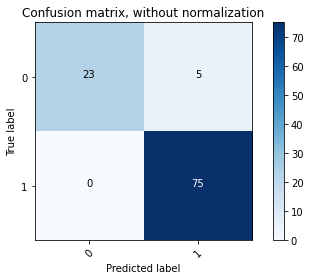

In [ ]:
# SVM classifier for best value of the hyperparameter C
clf = svm.SVC(  kernel = 'linear')
clf.fit( x_train, Y_train )
print("Train score: ", clf.score(x_train, Y_train))
print("Test score: ",clf.score(x_test,Y_test))
y_pred=clf.predict(x_test)
cnf_matrix_nb = confusion_matrix(Y_test, y_pred, labels=[0, 1])
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix_nb, classes=[0, 1],
                      title='Confusion matrix, without normalization')
print(classification_report(Y_test, y_pred,target_names=[ '0', '1']))

In [ ]:
test_file = []
for file in os.listdir("test1/test1/"): 
    test_file.append(file)

In [ ]:
!pwd

/content/gdrive/.shortcut-targets-by-id/11fY6QpzsiYw6V2T_S6CWlNWJBdypvsA-/Data


In [ ]:
from google.colab.patches import cv2_imshow
from PIL import Image, ImageFont, ImageDraw, ImageChops

In [ ]:
def showImage(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.show()

def ShowResult(img_name, dir=False):

    if dir == False:
        img_pil = Image.open(img_name)
    else: 
        img_pil = Image.open(dir + "/" + img_name)


    preprocess = transforms.Compose([
            transforms.Scale(256),
            transforms.CenterCrop(227),
            transforms.ToTensor()])
    
    img_tensor = preprocess(img_pil)
    img_tensor.unsqueeze_(0)

    img_var = Variable(img_tensor)
    out = model(img_var)

    newOut = np.squeeze(out)
    pred = clf.predict(out.data.numpy())
    text = "cat"
    if pred == 0:
        text = "dog"

    font = ImageFont.truetype(
    font="font/GILLUBCD.TTF",
    size=30)

    drawer = ImageDraw.Draw(img_pil)

    text_size = drawer.textsize(text=text, font=font)
    colors = img_pil.getpixel((0,0))
    inverse_colors = (255 - colors[0], 255 - colors[1], 255 - colors[2])

    drawer.text((0, 0), text, font=font, fill=inverse_colors)

    plt.imshow(img_pil)
    plt.show()




/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:310: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  warnings.warn("The use of the transforms.Scale transform is deprecated, " +


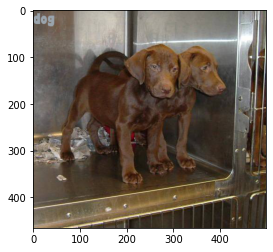

/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:310: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  warnings.warn("The use of the transforms.Scale transform is deprecated, " +


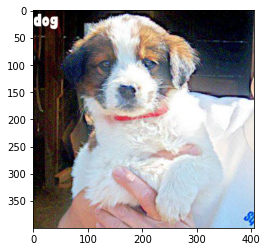

/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:310: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  warnings.warn("The use of the transforms.Scale transform is deprecated, " +


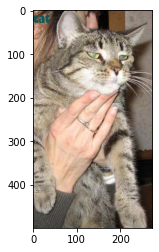

/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:310: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  warnings.warn("The use of the transforms.Scale transform is deprecated, " +


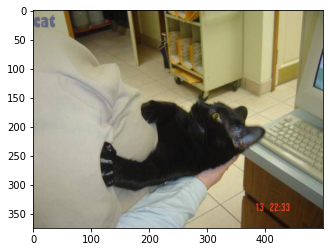

/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:310: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  warnings.warn("The use of the transforms.Scale transform is deprecated, " +


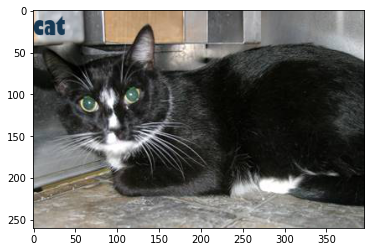

/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:310: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  warnings.warn("The use of the transforms.Scale transform is deprecated, " +


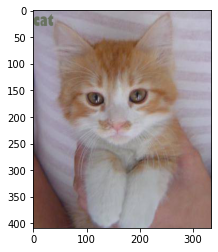

/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:310: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  warnings.warn("The use of the transforms.Scale transform is deprecated, " +


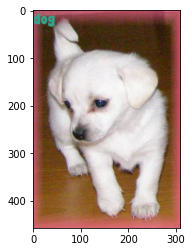

/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:310: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  warnings.warn("The use of the transforms.Scale transform is deprecated, " +


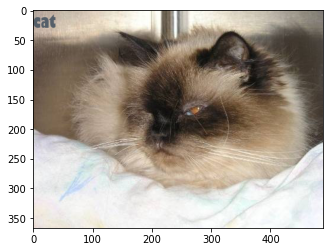

/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:310: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  warnings.warn("The use of the transforms.Scale transform is deprecated, " +


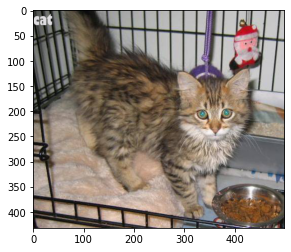

/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:310: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  warnings.warn("The use of the transforms.Scale transform is deprecated, " +


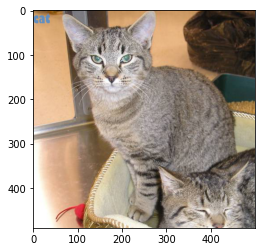

/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:310: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  warnings.warn("The use of the transforms.Scale transform is deprecated, " +


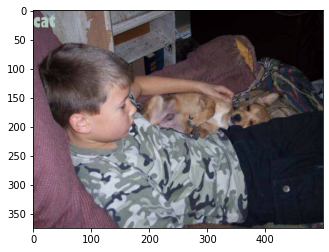

/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:310: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  warnings.warn("The use of the transforms.Scale transform is deprecated, " +


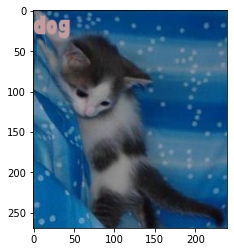

/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:310: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  warnings.warn("The use of the transforms.Scale transform is deprecated, " +


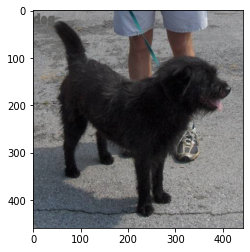

/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:310: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  warnings.warn("The use of the transforms.Scale transform is deprecated, " +


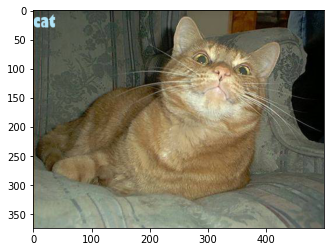

/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:310: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  warnings.warn("The use of the transforms.Scale transform is deprecated, " +


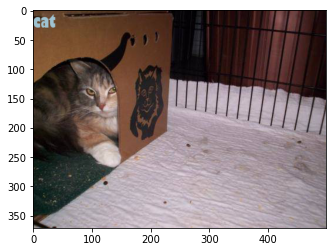

/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:310: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  warnings.warn("The use of the transforms.Scale transform is deprecated, " +


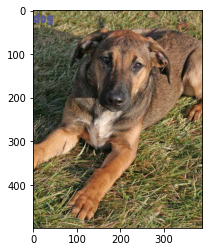

/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:310: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  warnings.warn("The use of the transforms.Scale transform is deprecated, " +


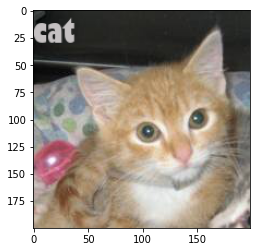

/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:310: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  warnings.warn("The use of the transforms.Scale transform is deprecated, " +


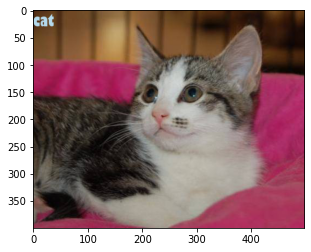

/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:310: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  warnings.warn("The use of the transforms.Scale transform is deprecated, " +


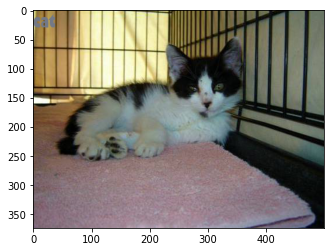

/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:310: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  warnings.warn("The use of the transforms.Scale transform is deprecated, " +


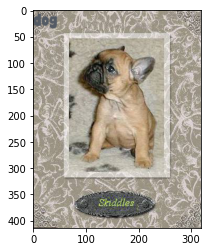

In [ ]:
for  img_name in test_file[20:40]:
    ShowResult(img_name, dir = 'test1/test1')
